# SCC403 Dataset 1

### 1. Import library & data

In [1]:
%%capture
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing   
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
colnames = ['Temperature (Min)','Temperature (Max)','Temperature (Mean)','Relative Humidity (Min)',
'Relative Humidity (Max)','Relative Humidity (Mean)','Sea Level Pressure (Min)','Sea Level Pressure (Max)',
'Sea Level Pressure (Mean)','Precipitation Total','Snowfall Amount','Sunshine Duration','Wind Gust (Min)',
'Wind Gust (Madf_pca)','Wind Gust (Mean)','Wind Speed (Min)','Wind Speed (Max)','Wind Speed (Mean)'] 
df = pd.read_csv('Data Files/ClimateDataBasel.csv', names=colnames, header=None)

### 2. Data pre-processing

After checking the data, there are no missing values and no obvious outlier

In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature (Min)          1763 non-null   float64
 1   Temperature (Max)          1763 non-null   float64
 2   Temperature (Mean)         1763 non-null   float64
 3   Relative Humidity (Min)    1763 non-null   int64  
 4   Relative Humidity (Max)    1763 non-null   int64  
 5   Relative Humidity (Mean)   1763 non-null   float64
 6   Sea Level Pressure (Min)   1763 non-null   float64
 7   Sea Level Pressure (Max)   1763 non-null   float64
 8   Sea Level Pressure (Mean)  1763 non-null   float64
 9   Precipitation Total        1763 non-null   float64
 10  Snowfall Amount            1763 non-null   float64
 11  Sunshine Duration          1763 non-null   float64
 12  Wind Gust (Min)            1763 non-null   float64
 13  Wind Gust (Madf_pca)       1763 non-null   float

,count,mean,std,min,25%,50%,75%,max
Temperature (Min),1763.0,8.738776,7.803700,-12.519471,1.700529,10.210529,15.530529,25.820530
Temperature (Max),1763.0,16.779298,9.647769,-4.389471,8.200529,17.400530,25.190529,36.700527
Temperature (Mean),1763.0,12.717350,8.788555,-7.628222,4.689279,14.618446,20.432404,30.425112
Relative Humidity (Min),1763.0,54.092456,12.949827,19.000000,44.000000,54.000000,64.000000,93.000000
Relative Humidity (Max),1763.0,87.004538,7.892077,53.000000,82.000000,88.000000,93.000000,100.000000
Relative Humidity (Mean),1763.0,71.040509,10.012178,38.333332,63.520834,72.000000,78.750000,95.250000
Sea Level Pressure (Min),1763.0,1014.690925,8.848251,976.100000,1010.300000,1014.600000,1019.300000,1043.600000
Sea Level Pressure (Max),1763.0,1020.364492,8.014133,981.400000,1015.900000,1019.500000,1024.400000,1049.900000
Sea Level Pressure (Mean),1763.0,1017.576393,8.282298,978.450000,1013.233400,1016.954040,1021.760405,1047.095800
Precipitation Total,1763.0,1.502893,3.496710,0.000000,0.000000,0.000000,1.200000,37.399994


Several of these features have collinearity

Text(0.5, 1, 'Corr Between Features')

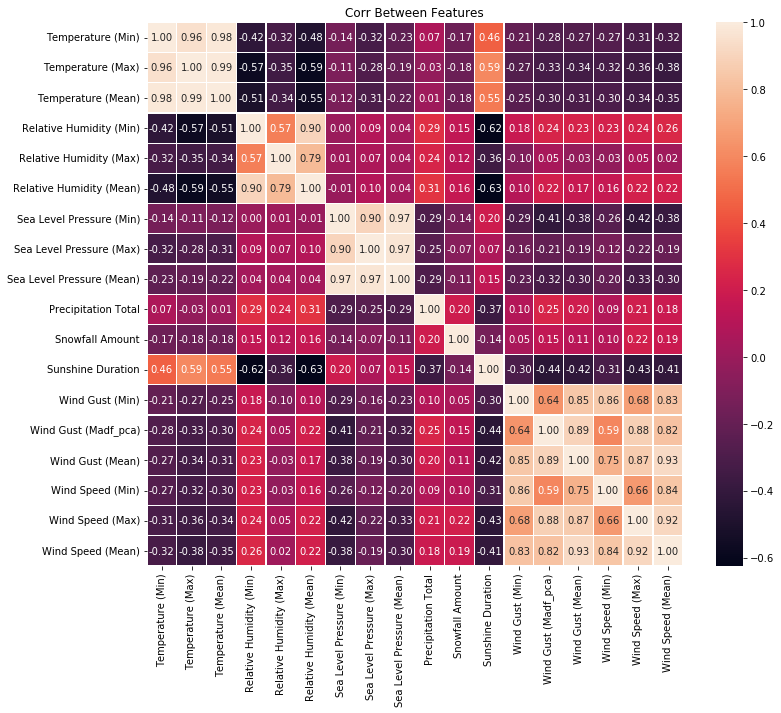

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Corr Between Features")
#plt.savefig("Plots/corr.png")

Normalization

In [5]:
df_scale = preprocessing.MinMaxScaler().fit_transform(df)
df_scale.shape

(1763, 18)

### 3.Dimensionality reduction with PCA

To get more than 80% of variance explained I need 3 principal components.

Text(0, 0.5, 'Cumlative Explained Variance')

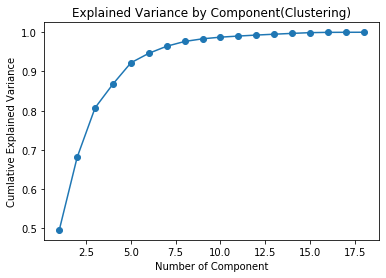

In [6]:
pca = PCA()
pca.fit(df_scale)
plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Explained Variance by Component(Clustering)")
plt.xlabel("Number of Component")
plt.ylabel("Cumlative Explained Variance")

In [7]:
pca = PCA(n_components=3)
pca.fit(df_scale)
df_pca = pca.transform(df_scale)
df_pca = pd.DataFrame(df_pca,columns=['Component1','Component2','Component3'])

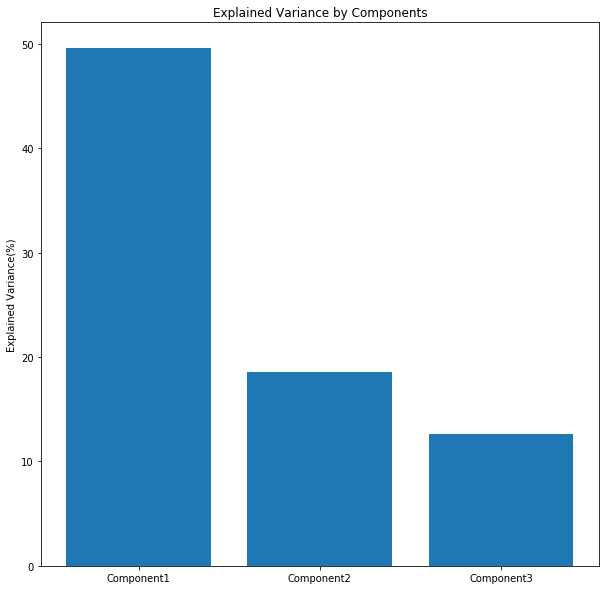

In [8]:
plt.figure(figsize=(10,10)) 
var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
plt.bar(x=range(1,len(var)+1), height = var, tick_label = df_pca.columns) 
plt.title("Explained Variance by Components")
plt.ylabel("Explained Variance(%)")
plt.show()

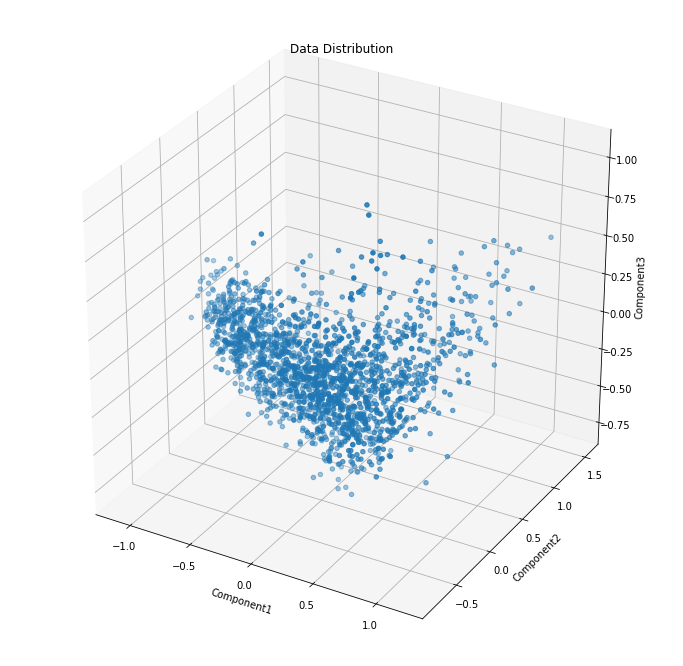

In [9]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2])
plt.title("Data Distribution")
ax.set_xlabel('Component1')
ax.set_ylabel('Component2')
ax.set_zlabel('Component3')
plt.show()

### 4. Model training

K-means

In [10]:
%%capture
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans_pca.fit(df_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 0, 'Number of Cluster')

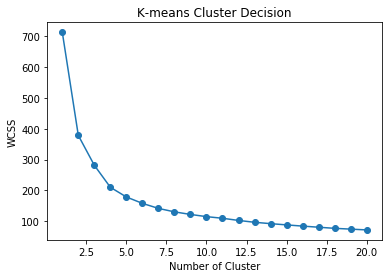

In [11]:
plt.plot(range(1,21),wcss, marker='o')
plt.title("K-means Cluster Decision")
plt.ylabel("WCSS")
plt.xlabel("Number of Cluster")

The kink comes at the 4 clusters mark. So, we’ll be keeping a four-cluster solution.

In [12]:
%%capture
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(df_pca)

In [13]:
df_pk = pd.concat([df.reset_index(drop=True),pd.DataFrame(df_pca)],axis=1)
df_pk.columns.values[-3:] = ['Component1','Component2','Component3']
df_pk['Labels'] = kmeans_pca.labels_
df_pk.head()

,Temperature (Min),Temperature (Max),Temperature (Mean),Relative Humidity (Min),Relative Humidity (Max),Relative Humidity (Mean),Sea Level Pressure (Min),Sea Level Pressure (Max),Sea Level Pressure (Mean),Precipitation Total,...,Wind Gust (Min),Wind Gust (Madf_pca),Wind Gust (Mean),Wind Speed (Min),Wind Speed (Max),Wind Speed (Mean),Component1,Component2,Component3,Labels
0,8.100529,17.570530,13.445111,61,96,77.875000,1013.1,1018.4,1015.75830,0.2,...,3.240000,23.400000,12.210002,1.787066,10.403253,6.639939,0.047328,-0.122723,-0.221917,0
1,11.110529,18.490528,14.988861,59,94,76.458336,1013.9,1016.6,1014.99170,1.9,...,6.479999,25.199999,14.880001,4.161301,16.285300,8.616541,0.059099,0.045368,-0.215932,0
2,10.320529,18.170528,14.267612,71,96,83.583336,1015.3,1017.5,1016.38745,0.1,...,3.240000,24.119999,12.764999,2.028842,11.289829,6.372418,0.193656,-0.082991,-0.424476,0
3,10.450529,24.980530,17.309278,54,92,77.625000,1015.9,1018.7,1017.26250,0.0,...,2.160000,20.160000,9.480000,0.799200,11.483046,4.690738,-0.430873,-0.182667,-0.012202,3
4,12.350529,25.610529,19.881780,47,88,66.583336,1015.7,1020.7,1018.18353,0.0,...,0.720000,15.840000,5.565001,0.376746,6.443357,3.311275,-0.642438,-0.207096,0.072880,3


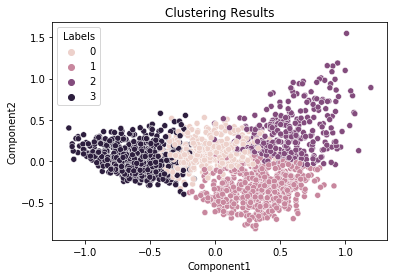

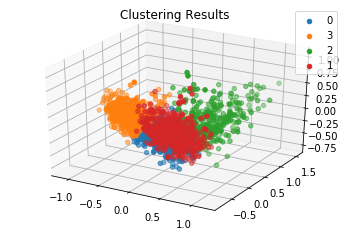

In [14]:
sns.scatterplot(data=df_pk, x='Component1',y='Component2',hue='Labels')
plt.title("Clustering Results")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("Clustering Results")

for s in df_pk.Labels.unique():
    ax.scatter(df_pk.Component1[df_pk.Labels==s],df_pk.Component2[df_pk.Labels==s],df_pk.Component3[df_pk.Labels==s],label=s)
    
ax.legend()

DBScan

In [15]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=6)
neighbors = nearest_neighbors.fit(df_pca)

distances, indices = neighbors.kneighbors(df_pca)
distances = np.sort(distances[:,5], axis=0)

0.14084031083875664


<Figure size 360x360 with 0 Axes>

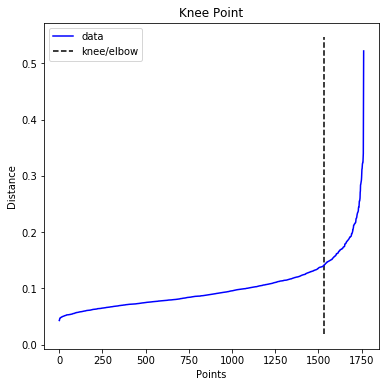

In [16]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

The knee occurs at approximately 0.14
For multidimensional dataset, minPts should be 2 * number of dimensions

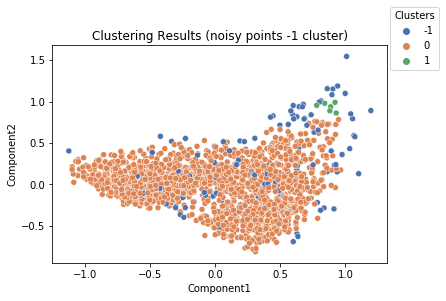

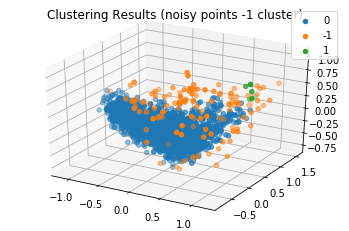

In [17]:
clusters = DBSCAN(eps=0.14, min_samples=6).fit(df_pca)

p = sns.scatterplot(data=df_pca, x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.title("Clustering Results (noisy points -1 cluster)")
plt.show()


df_test = pd.concat([df_pca.reset_index(drop=True),pd.DataFrame(clusters.labels_,columns=['Labels'])],axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df_test.Labels.unique():
    ax.scatter(df_test.Component1[df_test.Labels==s],df_test.Component2[df_test.Labels==s],df_test.Component3[df_test.Labels==s],label=s)

plt.title("Clustering Results (noisy points -1 cluster)")
ax.legend()